In [58]:
from netCDF4 import Dataset
import numpy as np

In [59]:
nc = Dataset('data/sbmn_cappi_20140103_031208.nc','r')

Extracting and plotting point Data

In [60]:
nc.dimensions.keys()

odict_keys(['time', 'bounds', 'x0', 'y0', 'z0'])

In [61]:
#fh.variables.keys()
for i in nc.variables:
    print ([i,nc.variables[i].shape])

['time', (1,)]
['start_time', (1,)]
['stop_time', (1,)]
['time_bounds', (1, 2)]
['x0', (241,)]
['y0', (241,)]
['lat0', (241, 241)]
['lon0', (241, 241)]
['z0', (40,)]
['grid_mapping_0', ()]
['VEL', (1, 40, 241, 241)]
['DBZc', (1, 40, 241, 241)]
['range', (1, 40, 241, 241)]
['Coverage', (1, 40, 241, 241)]


In [62]:
nc.variables['x0'].units

'km'

In [63]:
lons = nc.variables['lon0'][:]
lats = nc.variables['lat0'][:]
dbz = nc.variables['DBZc'][:][0][0:240]

dbz_units = nc.variables['DBZc'].units


## Ploting georefeced data

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [65]:
lat_0 = lats.mean()
lon_0 = lons.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0,)

/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [66]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon , lat = np.meshgrid(lons[0][:], lats[0][:])
xi, yi = m(lon, lat)

xi

masked_array(
  data=[[2260211.68551344, 2262210.42562489, 2264209.15413814, ...,
         2735790.00055725, 2737788.72906562, 2739787.46917214],
        [2260211.69969768, 2262210.43969081, 2264209.16808575, ...,
         2735789.98660969, 2737788.71499975, 2739787.45498795],
        [2260211.71373424, 2262210.45361029, 2264209.18188815, ...,
         2735789.97280734, 2737788.70108032, 2739787.44095144],
        ...,
        [2260211.71373424, 2262210.45361029, 2264209.18188815, ...,
         2735789.97280734, 2737788.70108032, 2739787.44095144],
        [2260211.69969768, 2262210.43969081, 2264209.16808575, ...,
         2735789.98660969, 2737788.71499975, 2739787.45498795],
        [2260211.68551344, 2262210.42562489, 2264209.15413814, ...,
         2735790.00055725, 2737788.72906562, 2739787.46917214]],
  mask=False,
  fill_value=1e+20)

In [67]:
# Plot Data
#cs = m.pcolor(xi,yi,np.squeeze(dbz.data[0]))

dbz.data[0]

# # # Add Grid Lines
# m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
# m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)


# # # Add Coastlines, States, and Country Boundaries
# m.drawcoastlines()
# m.drawstates()
# m.drawcountries()

# # # Add Colorbar
# cbar = m.colorbar(cs, location='bottom', pad="10%", size='10%')
# cbar.set_label(dbz_units)

# # # Add Title
# plt.title('DBZ Max')
# plt.show()

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [ ]:
dbz = nc.variables['DBZc'][:][0][0:240].data
A = dbz[0]
B = dbz[1]

teste = np.nansum(A+B)

conct = A + B
teste

In [ ]:
np.savetxt("./data/A2.csv", A2, delimiter=",")

In [89]:
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

In [90]:
xds = xr.open_dataset('data/sbmn_cappi_20140103_031208.nc')

In [91]:
lat = xds.DBZc['lat0'].data
lon = xds.DBZc['lon0'].data

In [92]:
a = xds['DBZc'].data[0][0]
b = xds['DBZc'].data[0][1]

In [93]:
result = np.where(
    np.isnan(a+b),
    np.where(np.isnan(a), b, a), 
    (a+b)/2
)
result
np.savetxt("./data/result.csv", result, delimiter=",")

In [94]:
def somaMat(a,b):
    result = np.where(
    np.isnan(a+b),
    np.where(np.isnan(a), b, a), 
    (a+b)
    )
    return result

In [95]:
total = xds['DBZc'].data[0][0]
for i in range(1,40,1):
    
    a = xds['DBZc'].data[0][i]
    total = somaMat(total,a)
    
np.savetxt("./data/soma40.csv", total/40, delimiter=",")

In [96]:
dbz2 = total

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [125]:
lat_0 = lat.mean()
lon_0 = lon.mean()

In [127]:
lat_ = np.ma.MaskedArray(lat)
lon_ = np.ma.MaskedArray(lon)

In [128]:
xi, yi = m(lon_, lat_)

/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


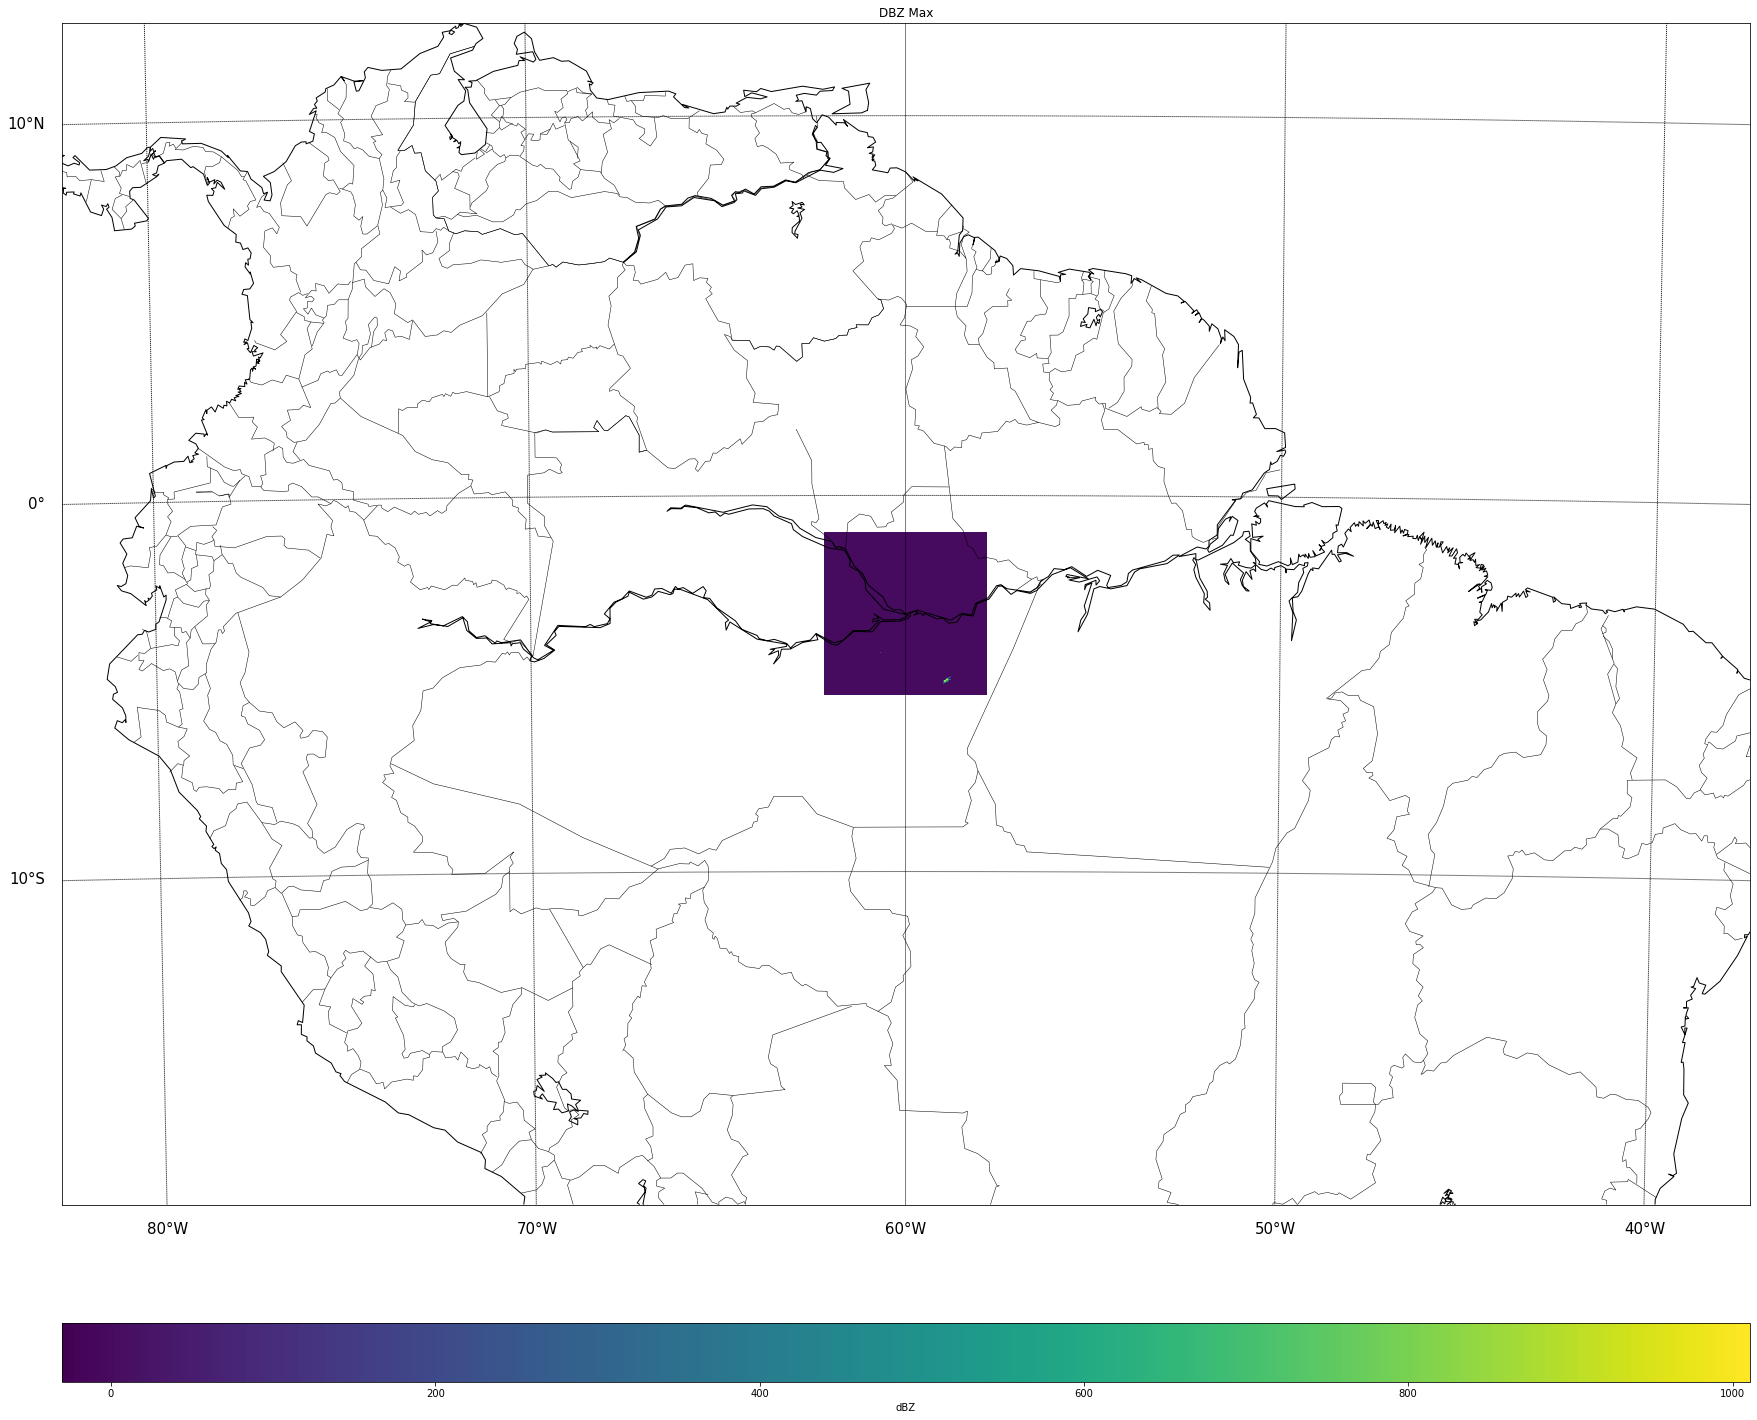

In [147]:
dados = np.nan_to_num(dbz2, nan=0.0)

plt.figure(figsize=(40,25))

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='lcc',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0,)

cs = m.pcolor(xi,yi,dados)


# # # # Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=15)


# # # # # Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# # # # # Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(dbz_units)

# # # # # Add Title
plt.title('DBZ Max')

plt.show()

'1.17.0'